# Marketing Analytics
The data can be found here - https://www.kaggle.com/datasets/jackdaoud/marketing-data.
The goal of this analysis is: 
* to understand the aquired data;
* to inspect the data & discover the outliers / anomalies (if there are any);
* to identify the most crucial variables needed for further analysis (in Tableau);
* etc...
Let's get started!

First, let's look at the available __dictionary__ that seems to be _briefly_ describing _some_ of the columns in the dataset.

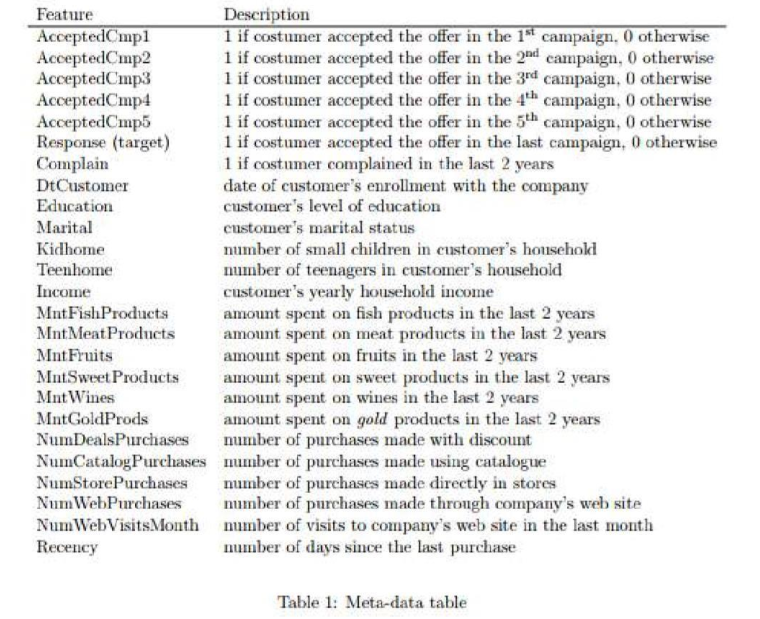

## Data Processing & Stuff

In [1]:
# Now, it's time to import the needed libraries...
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# ...and inspect the data!
data = pd.read_csv("ifood_df.csv")
data.head()
# P.S. 39 columns... That's a tough start!

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
# Let's see what are these 39 columns about...
data.info()
# P.S. Wow, no NaNs, only numeric types, that's great so far!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
# A bit more looking into the data properties:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


After looking at this data, it seems that we can divide the variables into the ones that describe a __customer__ & the ones that describe their __behavior__ (from the marketing perspective).

To describe a __customer__:
* Income;
* Kidhome;
* Teenhome;
* Age;
* Marital Data (marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow);
* Education Data (education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD).

To describe their __behavior__:
* all other variables.

_Right now the __goal__ is to __make this dataset more compact__ because with such a number of columns it's really hard to make some sense of it._

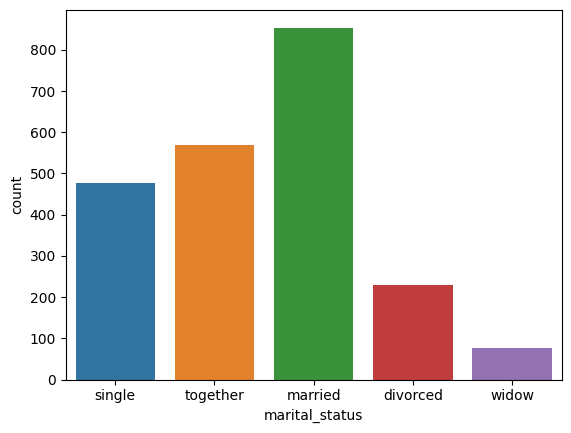

In [5]:
# Re-organizing the marital data:

#data[["marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"]].sum()
#data["marital_check"] = data["marital_Divorced"] + data["marital_Married"] + data["marital_Single"] + data["marital_Together"] + data["marital_Widow"] 
#data["marital_check"].describe()
marital_status = []
for i in data.index:
    if data["marital_Divorced"][i] == 1:
        marital_status.append("divorced")
    elif data["marital_Married"][i] == 1:
        marital_status.append("married")
    elif data["marital_Single"][i] == 1:
        marital_status.append("single")
    elif data["marital_Together"][i] == 1:
        marital_status.append("together")
    elif data["marital_Widow"][i] == 1:
        marital_status.append("widow")
    else:
        marital_status.append(np.NaN)
data["marital_status"] = marital_status
sns.countplot(x = data["marital_status"], data = data)
plt.show()

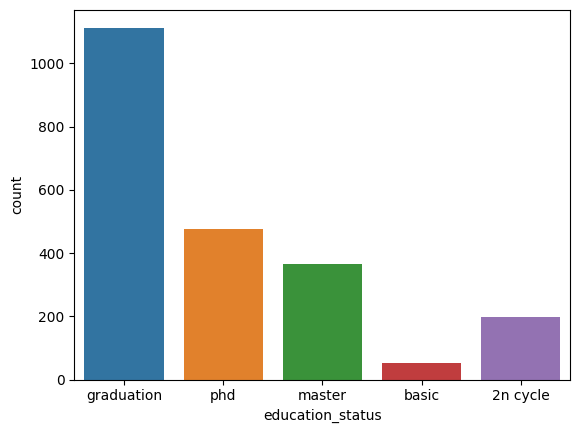

In [6]:
# Re-organizing the education data:

#data[["education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD"]].sum()
#data["education_check"] = data["education_2n Cycle"] + data["education_Basic"] + data["education_Graduation"] + data["education_Master"] + data["education_PhD"]
#data["education_check"].describe()
education_status = []
for i in data.index:
    if data["education_2n Cycle"][i] == 1:
        education_status.append("2n cycle")
    elif data["education_Basic"][i] == 1:
        education_status.append("basic")
    elif data["education_Graduation"][i] == 1:
        education_status.append("graduation")
    elif data["education_Master"][i] == 1:
        education_status.append("master")
    elif data["education_PhD"][i] == 1:
        education_status.append("phd")
    else:
        education_status.append(np.NaN)
data["education_status"] = education_status
sns.countplot(x = data["education_status"], data = data)
plt.show()

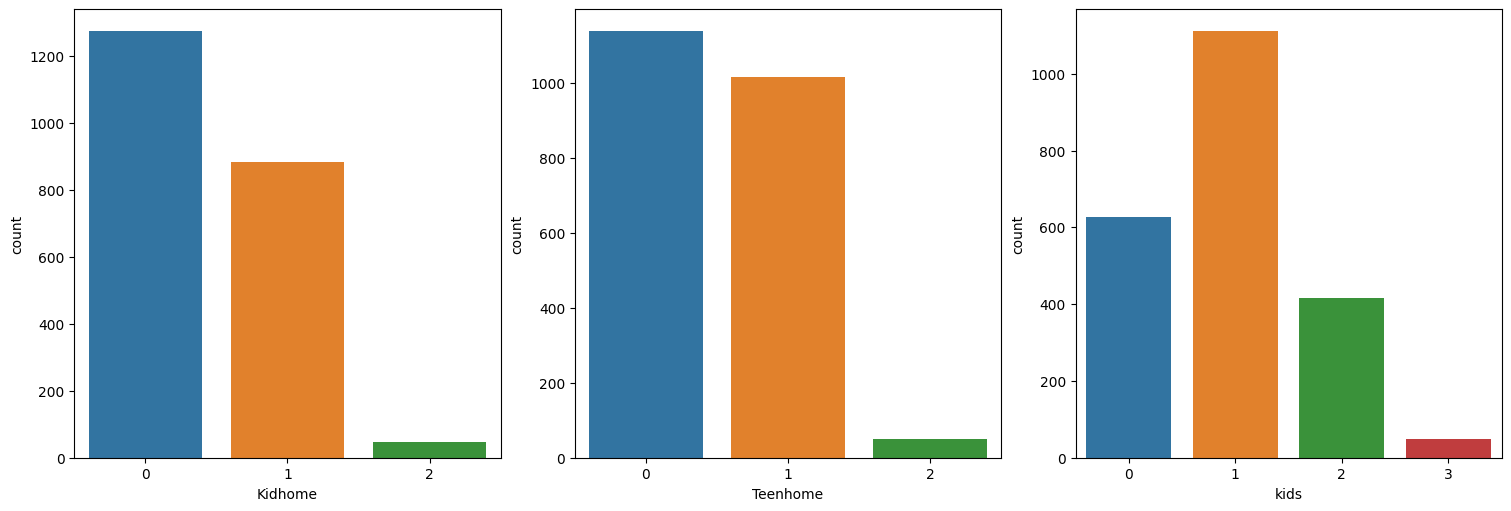

In [7]:
# Re-organizing the kids data:

data["kids"] = data["Kidhome"] + data["Teenhome"]
data["kids"].describe()

fig, axs = plt.subplots(1, 3, figsize = (15, 5), layout = "constrained")
sns.countplot(x = data["Kidhome"], data = data, ax = axs[0])
sns.countplot(x = data["Teenhome"], data = data, ax = axs[1])
sns.countplot(x = data["kids"], data = data, ax = axs[2])
plt.show()

In [8]:
# Checking the complain data:

data["Complain"].value_counts(normalize = True)
data[(data["Complain"] == 1)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_status,kids
72,26326.0,0,0,12,1,0,5,0,3,9,...,0,0,0,0,9,0,0,together,2n cycle,0
136,38547.0,1,0,49,6,1,10,0,1,4,...,0,1,0,0,18,14,0,together,graduation,1
257,31788.0,1,0,15,16,7,23,0,8,6,...,0,0,1,0,54,48,0,single,master,1
338,38643.0,1,1,45,22,2,14,0,1,10,...,0,1,0,0,39,29,0,single,graduation,2
341,65073.0,0,0,65,629,17,177,69,0,8,...,0,0,1,0,892,884,0,married,master,0
573,39684.0,1,0,41,19,0,35,6,4,17,...,0,0,0,1,64,47,0,single,phd,1
952,15716.0,1,0,8,16,5,30,8,7,26,...,0,0,0,0,66,40,0,married,2n cycle,1
1021,38998.0,1,1,92,34,1,14,0,0,5,...,0,1,0,0,49,44,0,married,graduation,2
1049,67023.0,0,0,93,444,44,382,11,8,17,...,0,1,0,0,889,872,0,married,graduation,0
1160,48070.0,0,1,33,373,14,83,6,9,19,...,0,1,0,0,485,466,0,together,graduation,1


In [9]:
# Checking the mnt data:

# MntTotal = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts (no MntGoldProds)
'''data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "MntRegularProds", "MntTotal"]]
total_check = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"]
data["total_check"] = total_check
data["total_check_bool"] = True
data["total_check_bool"] = data["total_check_bool"].where(data["total_check"] == data["MntTotal"], other = False)
data[["MntTotal", "total_check", "total_check_bool"]]
data["total_check_bool"].value_counts().plot.pie()
plt.show()
plt.close()'''

'data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "MntRegularProds", "MntTotal"]]\ntotal_check = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"]\ndata["total_check"] = total_check\ndata["total_check_bool"] = True\ndata["total_check_bool"] = data["total_check_bool"].where(data["total_check"] == data["MntTotal"], other = False)\ndata[["MntTotal", "total_check", "total_check_bool"]]\ndata["total_check_bool"].value_counts().plot.pie()\nplt.show()\nplt.close()'

In [10]:
# Re-organizing the mnt data:

data["wines_perc"] = data["MntWines"]/data["MntTotal"]
data["fruits_perc"] = data["MntFruits"]/data["MntTotal"]
data["meat_perc"] = data["MntMeatProducts"]/data["MntTotal"]
data["fish_perc"] = data["MntFishProducts"]/data["MntTotal"]
data["sweet_perc"] = data["MntSweetProducts"]/data["MntTotal"]
data[["wines_perc", "fruits_perc", "meat_perc", "fish_perc", "sweet_perc"]].describe()

,wines_perc,fruits_perc,meat_perc,fish_perc,sweet_perc
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,0.511275,0.059462,0.282549,0.085695,0.061019
std,0.237820,0.072815,0.133706,0.100472,0.077909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.335180,0.009444,0.179775,0.013301,0.009259
50%,0.517241,0.035088,0.272388,0.052029,0.038043
75%,0.703125,0.079310,0.373277,0.123077,0.081081
max,0.972222,0.762712,0.997687,0.750000,0.956204


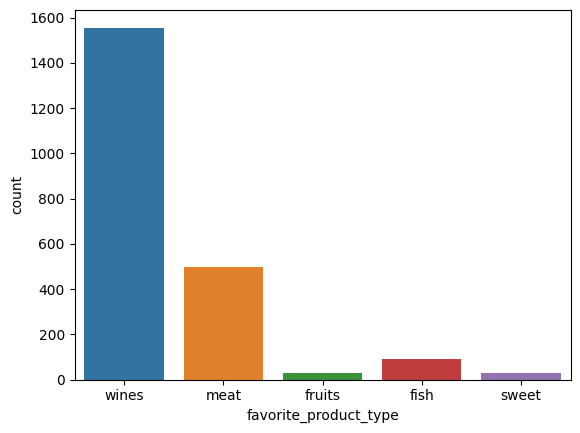

In [11]:
# Some more of the previous one:

data["favorite_product_type_perc"] = data[["wines_perc", "fruits_perc", "meat_perc", "fish_perc", "sweet_perc"]].max(axis = 1)
data["favorite_product_type_raw"] = data[["wines_perc", "fruits_perc", "meat_perc", "fish_perc", "sweet_perc"]].idxmax(axis = 1)
favorite_product_type = []
for i in data.index:
    if data["favorite_product_type_raw"][i] == "wines_perc":
        favorite_product_type.append("wines")
    elif data["favorite_product_type_raw"][i] == "fruits_perc":
        favorite_product_type.append("fruits")
    elif data["favorite_product_type_raw"][i] == "meat_perc":
        favorite_product_type.append("meat")
    elif data["favorite_product_type_raw"][i] == "fish_perc":
        favorite_product_type.append("fish")
    elif data["favorite_product_type_raw"][i] == "sweet_perc":
        favorite_product_type.append("sweet")
    else:
        favorite_product_type.append(np.NaN)
data["favorite_product_type"] = favorite_product_type
sns.countplot(x = data["favorite_product_type"], data = data)
plt.show()

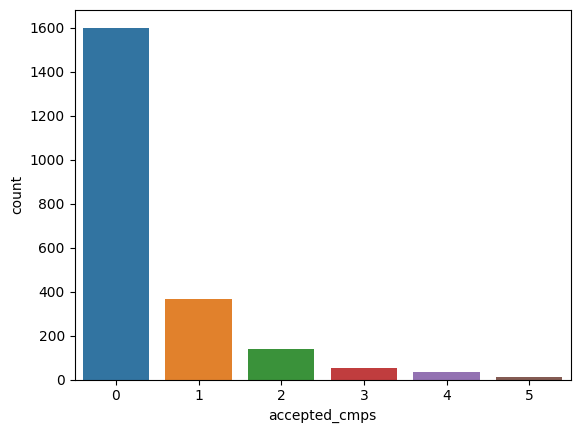

In [12]:
# Re-organizing the cmp data:

#data[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].head(10)
accepted_cmps = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"]
data["accepted_cmps"] = accepted_cmps
sns.countplot(x = data["accepted_cmps"], data = data)
plt.show()

In [13]:
# Since the cmp data spreads across 6 columns now, let's summarize it so that we can drop these columns later on:

data[["AcceptedCmp1", 
      "AcceptedCmp2", 
      "AcceptedCmp3", 
      "AcceptedCmp4", 
      "AcceptedCmp5", 
      "Response"]].sum()/len(data)*100

# It's clear that the most underperforming campaign is the 2nd one. The reasons for that are unclear at the moment.
# Campaigns 3, 4, and 5 perform well, with the 1st dragging behind a bit.
# But the total winner - is the last campaign!

AcceptedCmp1     6.439909
AcceptedCmp2     1.360544
AcceptedCmp3     7.392290
AcceptedCmp4     7.437642
AcceptedCmp5     7.301587
Response        15.102041
dtype: float64

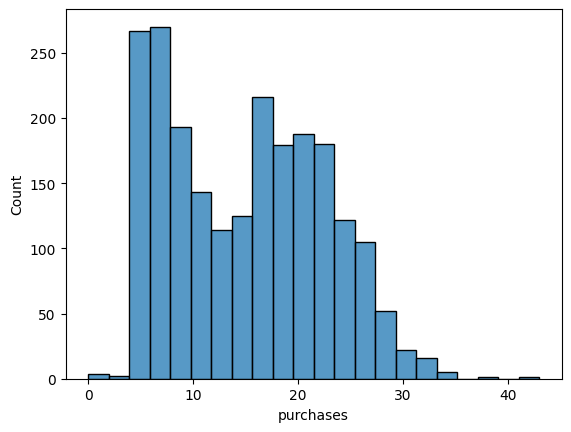

In [14]:
# Re-organizing the deals data:

data[["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].head(10)
purchases = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]
data["purchases"] = purchases
sns.histplot(x = data["purchases"], data = data)
plt.show()

In [15]:
# Some more of the previous one:

data["deals_perc"] = data["NumDealsPurchases"]/data["purchases"]
data["web_perc"] = data["NumWebPurchases"]/data["purchases"]
data["catalog_perc"] = data["NumCatalogPurchases"]/data["purchases"]
data["store_perc"] = data["NumStorePurchases"]/data["purchases"]
data[["deals_perc", "web_perc", "catalog_perc", "store_perc"]].describe()

,deals_perc,web_perc,catalog_perc,store_perc
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,0.180592,0.267620,0.141690,0.410097
std,0.110809,0.097860,0.125141,0.117364
min,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.200000,0.000000,0.333333
50%,0.166667,0.260870,0.120000,0.411765
75%,0.250000,0.333333,0.222222,0.500000
max,1.000000,1.000000,0.651163,1.000000


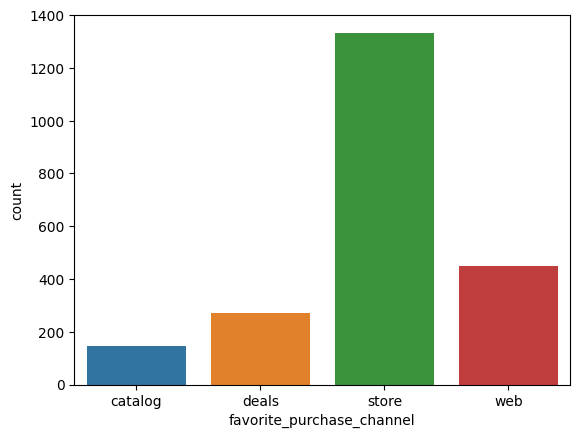

In [16]:
# Some more of the previous one:

data["favorite_purchase_channel_perc"] = data[["deals_perc", "web_perc", "catalog_perc", "store_perc"]].max(axis = 1)
data["favorite_purchase_raw"] = data[["deals_perc", "web_perc", "catalog_perc", "store_perc"]].idxmax(axis = 1)
favorite_purchase_channel = []
for i in data.index:
    if data["favorite_purchase_raw"][i] == "deals_perc":
        favorite_purchase_channel.append("deals")
    elif data["favorite_purchase_raw"][i] == "web_perc":
        favorite_purchase_channel.append("web")
    elif data["favorite_purchase_raw"][i] == "catalog_perc":
        favorite_purchase_channel.append("catalog")
    elif data["favorite_purchase_raw"][i] == "store_perc":
        favorite_purchase_channel.append("store")
    else:
        favorite_purchase_channel.append(np.NaN)
data["favorite_purchase_channel"] = favorite_purchase_channel
sns.countplot(x = data["favorite_purchase_channel"], data = data)
plt.show()

In [17]:
# Checking our monster dataset :D

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Income                          2205 non-null   float64
 1   Kidhome                         2205 non-null   int64  
 2   Teenhome                        2205 non-null   int64  
 3   Recency                         2205 non-null   int64  
 4   MntWines                        2205 non-null   int64  
 5   MntFruits                       2205 non-null   int64  
 6   MntMeatProducts                 2205 non-null   int64  
 7   MntFishProducts                 2205 non-null   int64  
 8   MntSweetProducts                2205 non-null   int64  
 9   MntGoldProds                    2205 non-null   int64  
 10  NumDealsPurchases               2205 non-null   int64  
 11  NumWebPurchases                 2205 non-null   int64  
 12  NumCatalogPurchases             22

In [18]:
# Now, cleaning it:

columns_to_drop = ["MntWines",
                  "MntFruits",
                  "MntMeatProducts",
                  "MntFishProducts",
                  "MntSweetProducts",
                  "NumDealsPurchases",
                  "NumWebPurchases",
                  "NumCatalogPurchases",
                  "NumStorePurchases",
                  "Complain",
                  "Z_CostContact",
                  "Z_Revenue",
                  "marital_Divorced",
                  "marital_Married",
                  "marital_Single",
                  "marital_Together",
                  "marital_Widow",
                  "education_2n Cycle",
                  "education_Basic",
                  "education_Graduation",
                  "education_Master",
                  "education_PhD",
                  "MntRegularProds",
                  "AcceptedCmpOverall",
                  "wines_perc",
                  "fruits_perc",
                  "meat_perc",
                  "fish_perc",
                  "sweet_perc",
                  "favorite_product_type_raw",
                  "deals_perc",
                  "web_perc",
                  "catalog_perc",
                  "store_perc",
                  "favorite_purchase_raw",
                  "Kidhome",
                  "Teenhome",
                  "AcceptedCmp3",
                  "AcceptedCmp4",
                  "AcceptedCmp5",
                  "AcceptedCmp1",
                  "AcceptedCmp2",
                  "Response"]
data = data.drop(columns = columns_to_drop)

In [19]:
data.rename(columns = {"Income": "income",
                       "Recency": "recency",
                       "MntGoldProds": "mnt_gold_prods",
                       "Age": "age",
                       "NumWebVisitsMonth": "num_web_visits_month",
                       "Customer_Days": "customer_days",
                       "MntTotal": "mnt_total"}, inplace = True)

In [20]:
# Checking again:

data.info()
# Looks perfect! 15 COLUMNS ONLY!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   income                          2205 non-null   float64
 1   recency                         2205 non-null   int64  
 2   mnt_gold_prods                  2205 non-null   int64  
 3   num_web_visits_month            2205 non-null   int64  
 4   age                             2205 non-null   int64  
 5   customer_days                   2205 non-null   int64  
 6   mnt_total                       2205 non-null   int64  
 7   marital_status                  2205 non-null   object 
 8   education_status                2205 non-null   object 
 9   kids                            2205 non-null   int64  
 10  favorite_product_type_perc      2205 non-null   float64
 11  favorite_product_type           2205 non-null   object 
 12  accepted_cmps                   22

In [21]:
# Now we can finally see all columns described!

data.describe(include = "all")

,income,recency,mnt_gold_prods,num_web_visits_month,age,customer_days,mnt_total,marital_status,education_status,kids,favorite_product_type_perc,favorite_product_type,accepted_cmps,purchases,favorite_purchase_channel_perc,favorite_purchase_channel
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205,2205,2205.000000,2205.000000,2205,2205.000000,2205.000000,2203.000000,2203
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN,NaN,5,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,married,graduation,NaN,NaN,wines,NaN,NaN,NaN,store
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854,1113,NaN,NaN,1556,NaN,NaN,NaN,1334
mean,51622.094785,49.009070,44.057143,5.336961,51.095692,2512.718367,562.764626,NaN,NaN,0.948753,0.573976,NaN,0.450340,14.887982,0.445233,NaN
std,20713.063826,28.932111,51.736211,2.413535,11.705801,202.563647,575.936911,NaN,NaN,0.749231,0.172587,NaN,0.894075,7.615277,0.092109,NaN
min,1730.000000,0.000000,0.000000,0.000000,24.000000,2159.000000,4.000000,NaN,NaN,0.000000,0.222222,NaN,0.000000,0.000000,0.250000,NaN
25%,35196.000000,24.000000,9.000000,3.000000,43.000000,2339.000000,56.000000,NaN,NaN,0.000000,0.440895,NaN,0.000000,8.000000,0.375000,NaN
50%,51287.000000,49.000000,25.000000,6.000000,50.000000,2515.000000,343.000000,NaN,NaN,1.000000,0.545455,NaN,0.000000,15.000000,0.428571,NaN
75%,68281.000000,74.000000,56.000000,7.000000,61.000000,2688.000000,964.000000,NaN,NaN,1.000000,0.705157,NaN,1.000000,21.000000,0.500000,NaN


### Describing a Customer Briefly:
#### Our Average Customer:
* earns around $51K per year;
* they are around 50 years old;
* more than a third of them are married;
* and more than a half have "graduation" as their education description;
* in half of the cases, they live with 1 underage person (either a kid or a teen) under a roof.

#### Their Customer Behavior:
* they've purchased with us for the last time almost 50 days ago!
* during the month, they visit the WEB page 6 times;
* they've been our customers for almost 6 years;
* and spent 343 with us;
* their favorite product type is wine;
* they don't accept our campaigns (and if they do, that's most likely to be the last one!);
* they make 15 purchases, primarily - through the store;
* one more, they (almost!) don't complain :)

## High-Level Analysis

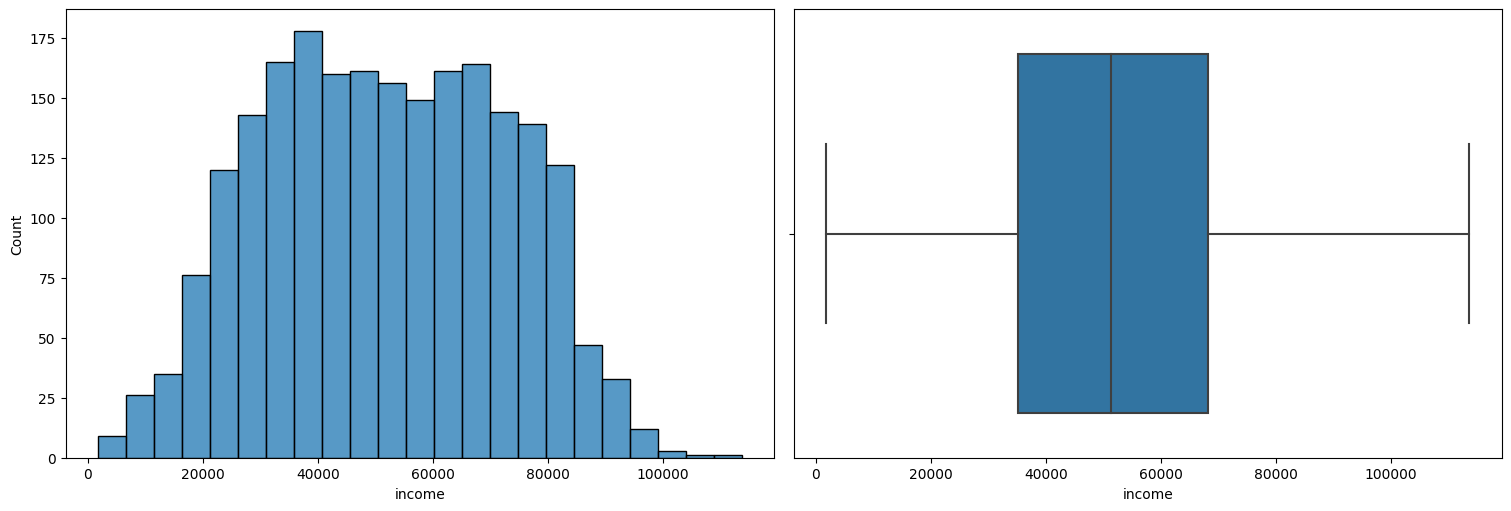

In [22]:
# It's time to play around with the available data. Here how the "Income" values are distributed:

fig, axs = plt.subplots(1, 2, figsize = (15, 5), layout = "constrained")
sns.histplot(x = data["income"], data = data, ax = axs[0])
sns.boxplot(x = data["income"], data = data, ax = axs[1])
plt.show()

# Looks pretty decent to me! With the mode around $50K, lower quartile - around $37K, upper - almost $70K. 
# So the IQR should be around $40K+.
# The distribution looks a bit skewed because of the outliers who earn way more than the majority. 

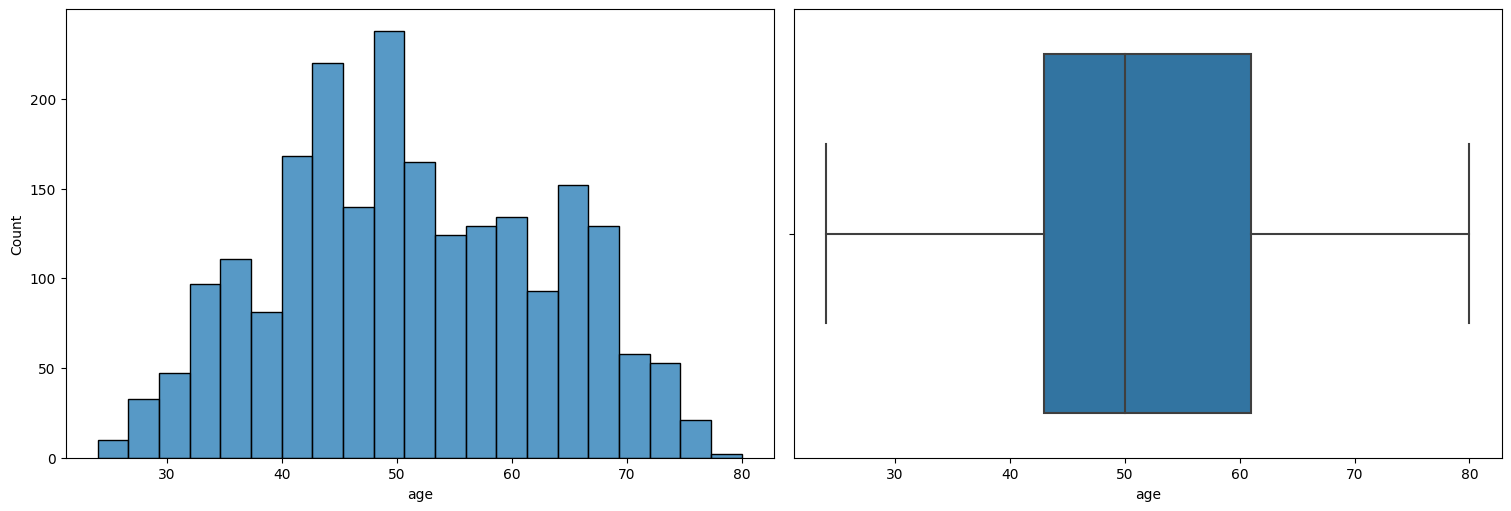

In [23]:
# "Age" data:

fig, axs = plt.subplots(1, 2, figsize = (15, 5), layout = "constrained")
sns.histplot(x = data["age"], data = data, ax = axs[0])
sns.boxplot(x = data["age"], data = data, ax = axs[1])
plt.show()

# A clear multimodal distribution that tends to be treated as a normal one.

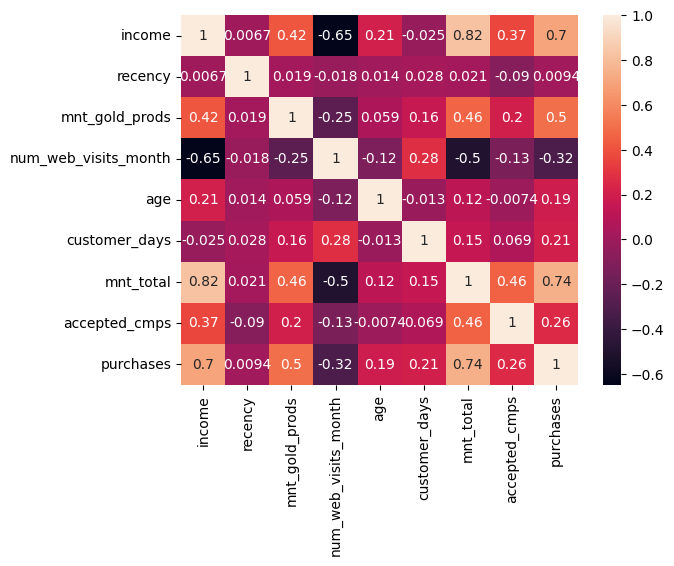

In [24]:
sns.heatmap(data[["income", 
                "recency", 
                "mnt_gold_prods", 
                "num_web_visits_month", 
                "age", 
                "customer_days", 
                "mnt_total", 
                "accepted_cmps",
                "purchases"]].corr(), annot = True)
plt.show()

So, it seems that more our customer earns, more they buy, spend & less they visit our WEB page.

Also, it does look like the more campaigns they accept - the more they spend. Bad thing is that a comparably small group of our customers does that.

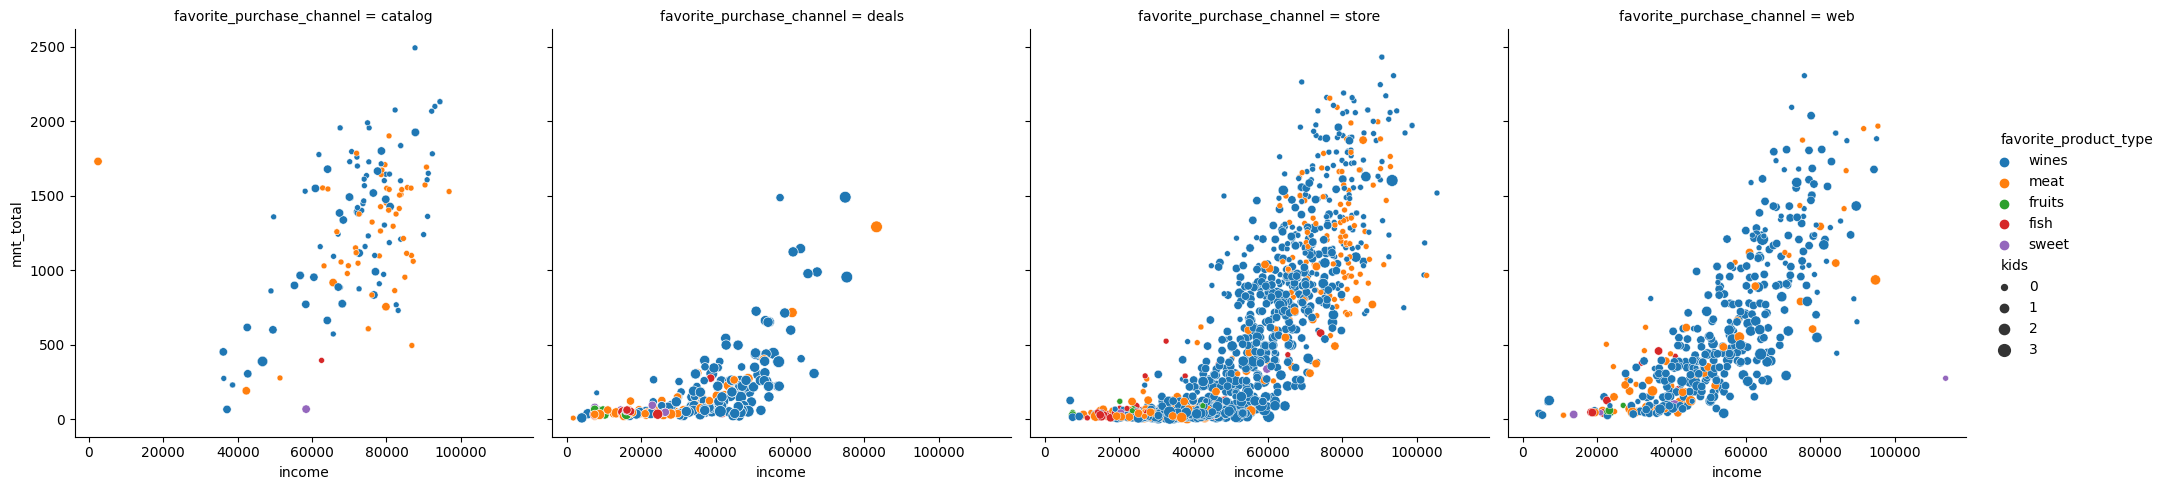

In [25]:
sns.relplot(data = data, 
            x = "income", 
            y = "mnt_total", 
            hue = "favorite_product_type", 
            col = "favorite_purchase_channel", 
            size = "kids")
plt.show()

According to the data:
* even though the customers don't prefer purchasing through our catalog, we still see some of them doing it. And they seem to be earning & spending a bit more than the average customer. Despite the catalogs being not that popular, we should still support this channel because of these guys & try gently moving them to the store/web (which might be even better!);
* the most non-profitable channel seems to be "deals". But it benefits our customers with lower incomes (they also seem to have more kids);
* "store" & "web" curves look alike. The more our client earns - the more they spend with us (preferably, on wine).

For further analysis let's more to Tableau :)

In [26]:
# Exporting the data for further analysis:
data.to_csv("ifood_df_processed.csv", index = True)